In [1]:
##### setting
### set filename you want to analysis
filepath = None

if filepath == None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
filename = os.path.basename(filepath)


In [2]:
##### import
# from smooziee.smooziee.fitting import Fitting
# from smooziee.smooziee.peak_search import PeakSearch
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
imp.reload(fitting)
imp.reload(peak_search)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [3]:
import pickle
with open('pksearch.pickle', 'rb') as f:
    processor = pickle.load(f) 

print(processor.x.shape)
print(processor.y.shape)
print(processor.ix_peaks)
print(processor.ix_peak_pairs)

(73,)
(73,)
[7, 15, 21, 28, 36, 47, 55]
[[7, 36], [15, 28]]


In [4]:
class PeakSearch():
    def __init__(self, x, ix_peaks, ix_peakpairs):
        self.x = x
        self.ix_peaks = ix_peaks
        self.ix_peakpairs = ix_peakpairs

peaksearch = PeakSearch(processor.x,
                        processor.ix_peaks,
                        processor.ix_peak_pairs)

fit = fitting.Fitting(peaksearch,
                      ['lorentzian' for i in range(len(processor.ix_peaks))])


In [5]:
fit.set_params_vary([0, 6], ['sigma'], vary=False)

In [6]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1    1e-08      inf     None     True     None     None
l0_center           -7     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1    1e-08      inf     None    False     None     None
l1_amplitude         1    1e-08      inf     None     True     None     None
l1_center           -3     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1    1e-08      inf     None     True     None     None
l2_amplitude         1    1e-08      inf     None     True 

In [7]:
fit.fit(processor.x, processor.y)

In [8]:
fit.result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     1.878    1e-08      inf   0.1232     True     None     None
l0_center       -7.414     -inf      inf  0.05858     True     None     None
l0_fwhm              2     -inf      inf        0    False 2.0000000*l0_sigma     None
l0_height       0.5978     -inf      inf  0.03922    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1    1e-08      inf        0    False     None     None
l1_amplitude     3.728    1e-08      inf   0.3359     True     None     None
l1_center        -2.87     -inf      inf    0.296     True     None     None
l1_fwhm          6.614     -inf      inf   0.8092    False 2.0000000*l1_sigma     None
l1_height       0.3588     -inf      inf  0.02883    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         3.307    1e-08      inf   0.4046     True     None     None
l2_amplitude     4.909    1e-08      inf 1.882e+05     True

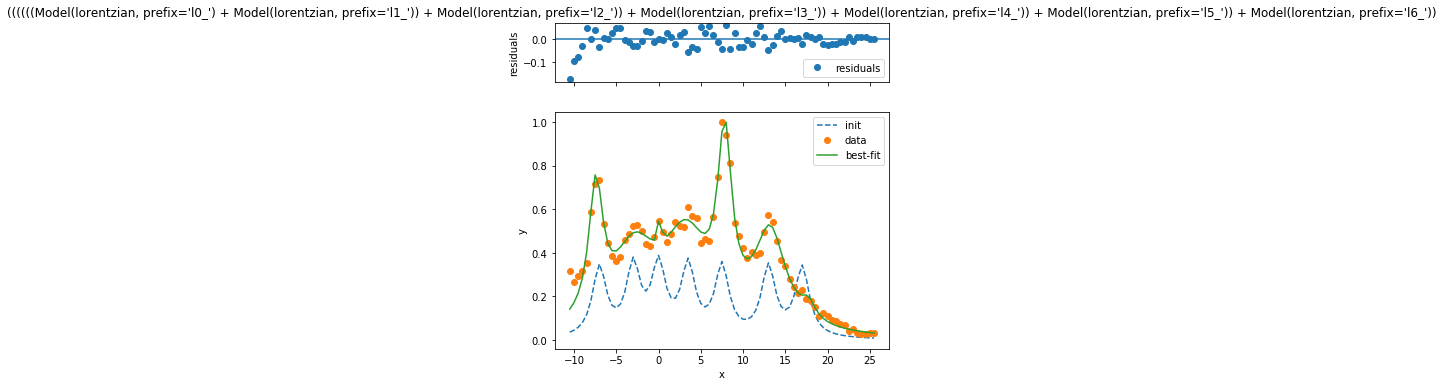

In [9]:
fit.plot(show_init=True)

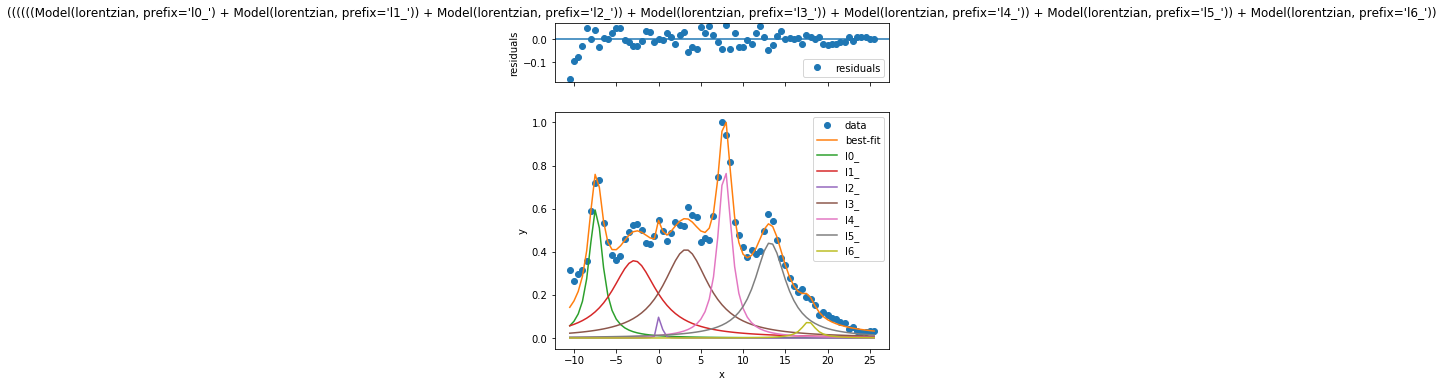

In [10]:
fit.plot_evalcomponents()

In [11]:
fit.params['l0_sigma'].set(min=1e-8)